In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [267]:
data = pd.read_csv("data/Bengaluru_House_Data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [268]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [269]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [270]:
data.shape

(13320, 9)

In [271]:
data.isnull().any()

area_type       False
availability    False
location         True
size             True
society          True
total_sqft      False
bath             True
balcony          True
price           False
dtype: bool

In [272]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

Null value cleaning


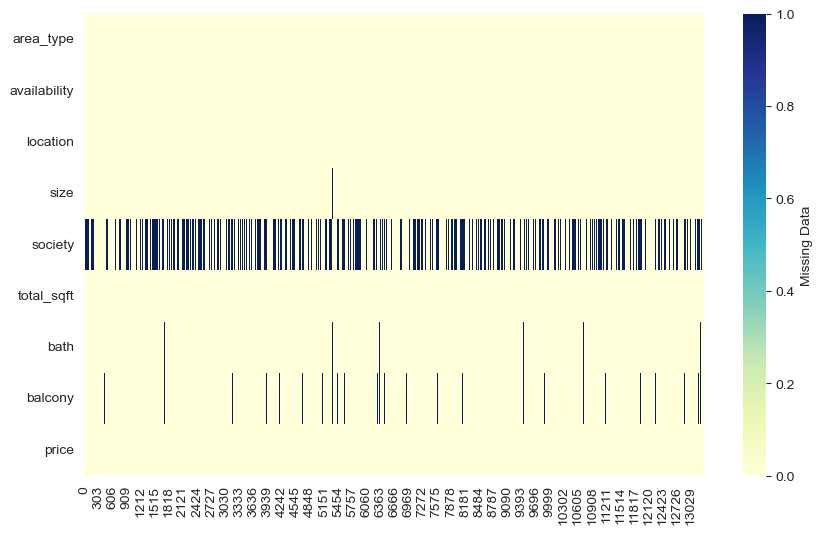

In [273]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)


In [274]:
data.drop(columns=['society','balcony','availability'],inplace=True)
data.columns

Index(['area_type', 'location', 'size', 'total_sqft', 'bath', 'price'], dtype='object')

In [275]:
data.isna().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [276]:
data['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [277]:
data['location'] = data['location'].fillna("Sarjapur  Road")
data['location'].isna().sum()

0

In [278]:
data['bath'].value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

In [279]:
data['bath'] = data['bath'].fillna(data['bath'].median())
data['bath'].isna().sum()

0

In [280]:
data['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [281]:
data['size'] = data['size'].fillna("2 BHK")
data['size'].isna().sum()

0

In [282]:
data.isna().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

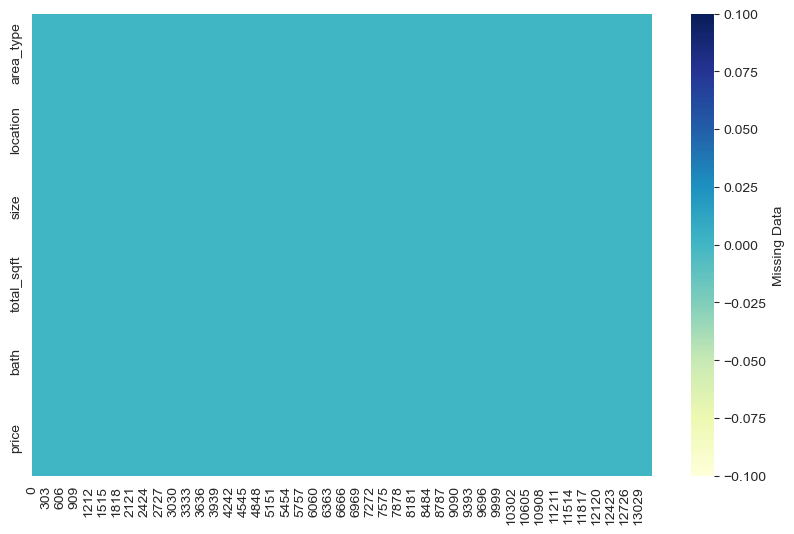

In [283]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

In [284]:
print(data['total_sqft'].unique())
data["total_sqft"]= data["total_sqft"].astype(str)

['1056' '2600' '1440' ... '1133 - 1384' '774' '4689']


In [285]:
def convert_total_sqrt_float(data):
    info = data.split("-")
    try:
        if len(info) == 2:
            return float(data[0]) + float(data[1]) / 2
        else:
            return float(data)
    except:
        return None

In [286]:
data['total_sqft'] = data['total_sqft'].apply(convert_total_sqrt_float)
data["total_sqft"].unique()

array([1056., 2600., 1440., ..., 2758.,  774., 4689.])

In [287]:
data['total_sqft'].isnull().sum()

46

In [288]:
data['total_sqft'] = data['total_sqft'].fillna(data['total_sqft'].median())
data['total_sqft'].isna().sum()

0

In [289]:
data["size"] = data["size"].str.replace("Bedroom", "BHK")

In [290]:
print(data["total_sqft"].unique())

[1056. 2600. 1440. ... 2758.  774. 4689.]


In [291]:
data["total_sqft"]= data["total_sqft"].astype(float)

In [292]:
data["price_per_sqft"] = data["price"]*100000/data["total_sqft"]
data.head()

,area_type,location,size,total_sqft,bath,price,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,3699.810606
1,Plot Area,Chikka Tirupathi,4 BHK,2600.0,5.0,120.00,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,4250.000000


In [293]:
data = data.reset_index(drop=True)
data.head()

,area_type,location,size,total_sqft,bath,price,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,3699.810606
1,Plot Area,Chikka Tirupathi,4 BHK,2600.0,5.0,120.00,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,4250.000000


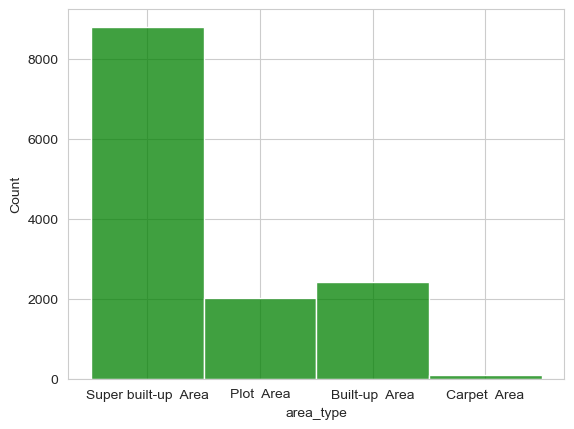

In [294]:
sns.histplot(data.area_type, color = "green")
plt.show()

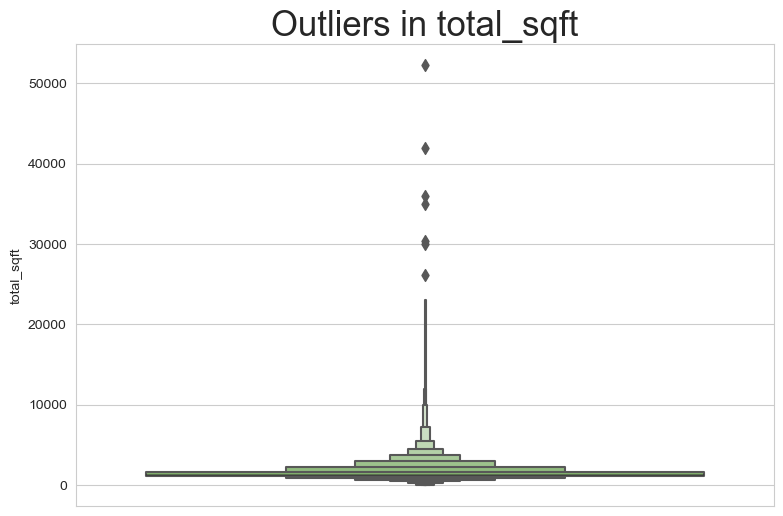

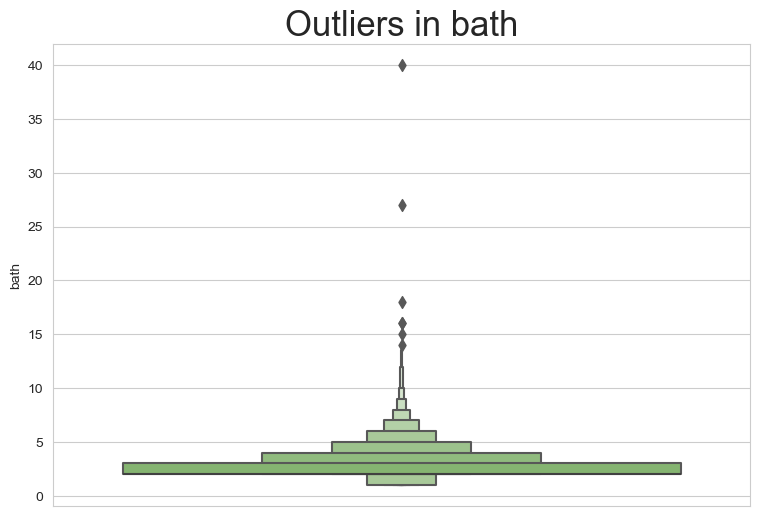

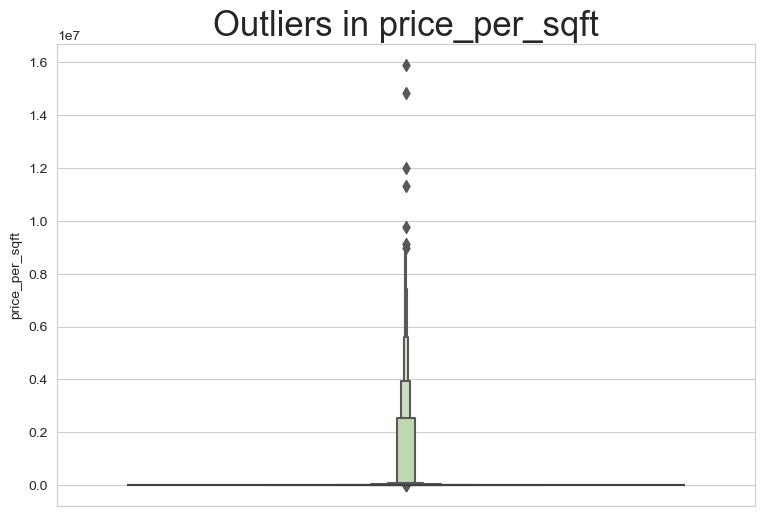

In [297]:
for col in ["total_sqft", "bath", "price_per_sqft"]:
    plt.figure(figsize=(9,6));
    sns.boxenplot(y=col,data=data,palette='summer');
    plt.title(f'Outliers in {col}',fontsize=25,fontweight=5);
    plt.show()

In [298]:
data = data[(data["total_sqft"] >= 100) | (data["total_sqft"] <= 5000)]

In [304]:
print(data['total_sqft'].value_counts())

1200.0    838
1100.0    221
1500.0    205
2400.0    195
600.0     180
         ... 
961.0       1
621.0       1
981.0       1
1548.3      1
4689.0      1
Name: total_sqft, Length: 1914, dtype: int64


In [299]:
data = data[(data["bath"] <= 10)]

In [305]:
data = data[(data["price_per_sqft"]>=1300) | (data['price_per_sqft']<=50000)]

In [306]:
data.head()

,area_type,location,size,total_sqft,bath,price,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,3699.810606
1,Plot Area,Chikka Tirupathi,4 BHK,2600.0,5.0,120.00,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,4250.000000


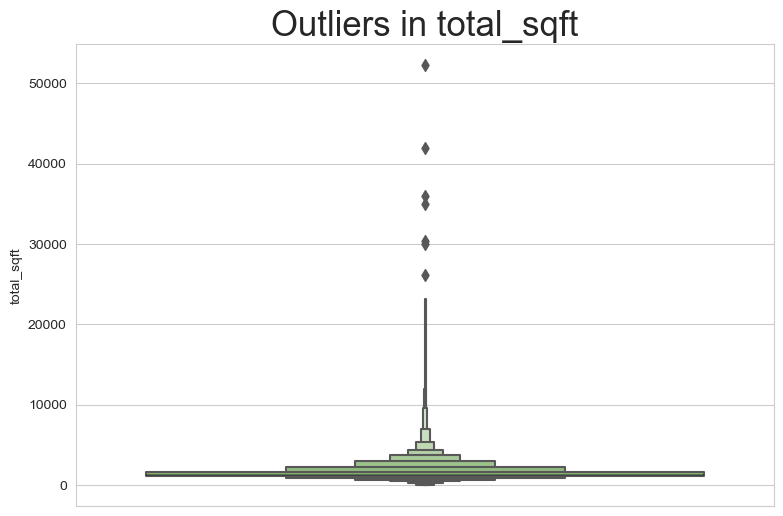

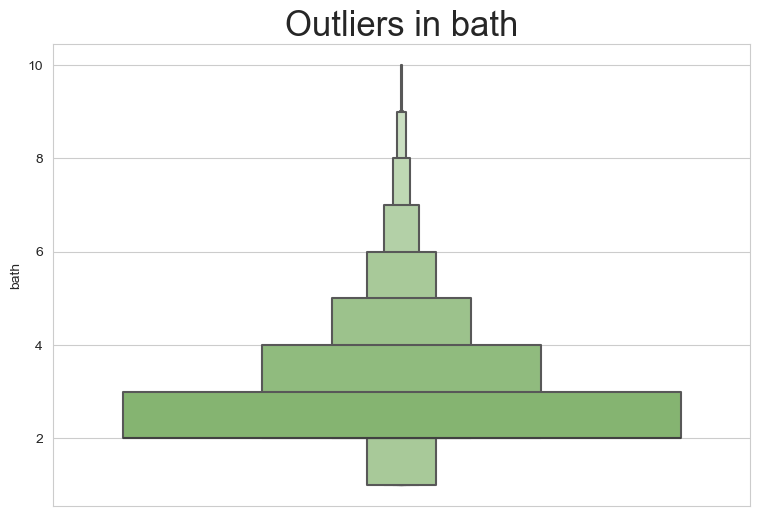

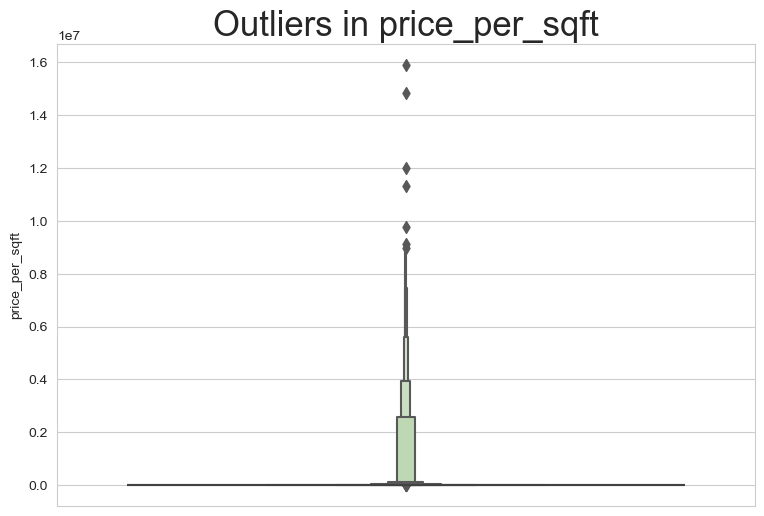

In [307]:
for col in ["total_sqft", "bath", "price_per_sqft"]:
    plt.figure(figsize=(9,6));
    sns.boxenplot(y=col,data=data,palette='summer');
    plt.title(f'Outliers in {col}',fontsize=25,fontweight=5);
    plt.show()

In [309]:
from sklearn.preprocessing import LabelEncoder

In [312]:
encoder = LabelEncoder()
data['area_type'] = encoder.fit_transform(data['area_type'])
data['location'] = encoder.fit_transform(data['location'])
data['size'] = encoder.fit_transform(data['size'])
data.head()

,area_type,location,size,total_sqft,bath,price,price_per_sqft
0,3,412,5,1056.0,2.0,39.07,3699.810606
1,2,310,7,2600.0,5.0,120.00,4615.384615
2,0,1171,6,1440.0,2.0,62.00,4305.555556
3,3,749,6,1521.0,3.0,95.00,6245.890861
4,3,708,5,1200.0,2.0,51.00,4250.000000


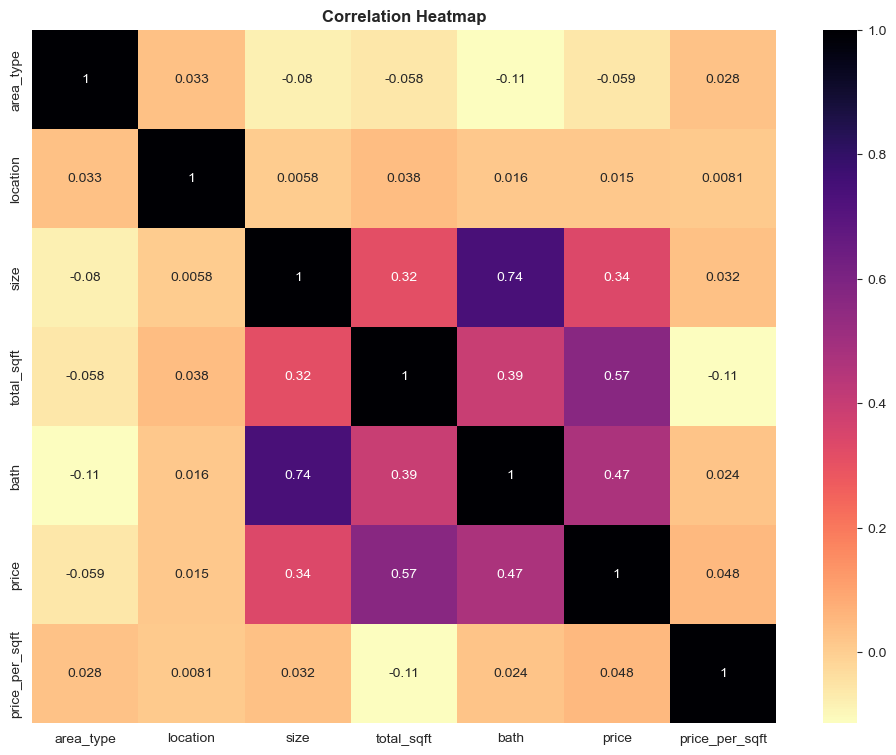

In [314]:
plt.figure(figsize = (12,9))
sns.heatmap(data.corr(), annot = True, cmap = "magma_r")
plt.title("Correlation Heatmap",fontdict = {"fontweight":"bold"})
plt.show()

In [315]:
x = data.drop(["price", "area_type", "location"], axis = 1)

In [316]:
y= data['price']

In [317]:
x = x.values
y = y.values

In [318]:
from sklearn.model_selection import train_test_split

In [319]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

Applying Linear Model Regression

In [320]:
from sklearn import linear_model

In [321]:
model = linear_model.LinearRegression()

In [322]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [323]:
from sklearn.metrics import r2_score

In [324]:
r2_score = model.score(x_test,y_test)
print(r2_score*100,'%')

53.95261740277114 %


Applying Random Forest Regressor

In [325]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=10, verbose=4)
model.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


RandomForestRegressor(n_estimators=10, verbose=4)

In [326]:
y_pred = model.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [327]:
r2_score = model.score(x_test,y_test)
print(r2_score*100,'%')

96.49726273583492 %


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


Applying decision Tree Regressor

In [329]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

In [330]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [331]:
r2_score = model.score(x_test,y_test)
print(r2_score*100,'%')

97.13354684036749 %


Applying KNeighors Regressor

In [332]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=10)

In [333]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [334]:
r2_score = model.score(x_test,y_test)
print(r2_score*100,'%')

88.94132687208737 %
